In [ ]:
    from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from keras.utils import load_img, img_to_array
from keras.utils  import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
# from PIL import Image
import cv2
import numpy as np
import pandas as pd
from time import time
import os
import random
from keras.models import Sequential, Model
from keras.layers import *
from keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.engine.training import optimizers
from keras.backend import categorical_crossentropy
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

do quá trình chia tập dữ liệu bị lỗi nên phải chia tay và gọi ra từng tập dữ liệu 


In [ ]:
#lấy tập train
DIRECTORY_train = r"/content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/train"
CATEGORIES_train = ["bênh đóng dấu ở lợn","bệnh tai xanh ở heo","heo khỏe mạnh", "lmlm", "tụ huyết trùng", "viên da tiết dịch"]
#lấy tập test
DIRECTORY_test = r"/content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/test"
CATEGORIES_test = ["bênh đóng dấu ở lợn","bệnh tai xanh ở heo","heo khỏe mạnh", "lmlm", "tụ huyết trùng", "viên da tiết dịch"]
#lấy tập val
DIRECTORY_val = r"/content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/val"
CATEGORIES_val = ["bênh đóng dấu ở lợn","bệnh tai xanh ở heo","heo khỏe mạnh", "lmlm", "tụ huyết trùng", "viên da tiết dịch"]

train = []
test = []
val = []

img_size = 150

In [ ]:
for category_train in CATEGORIES_train:
    path_train = os.path.join(DIRECTORY_train, category_train)
    class_num_train = CATEGORIES_train.index(category_train) 
    for img_train in os.listdir(path_train):
        img_path_train = os.path.join(path_train, img_train)
        image_train = cv2.imread(img_path_train, cv2.IMREAD_GRAYSCALE)
        image_array_train = cv2.resize(image_train,(img_size,img_size))     
        train.append([image_array_train,class_num_train])
print(len(train))

247


In [ ]:
for category_test in CATEGORIES_test:
    path_test = os.path.join(DIRECTORY_test, category_test)
    class_num_test = CATEGORIES_test.index(category_test) 
    for img_test in os.listdir(path_test):
        img_path_test = os.path.join(path_test, img_test)
        image_test = cv2.imread(img_path_test, cv2.IMREAD_GRAYSCALE)
        image_array_test = cv2.resize(image_test,(img_size,img_size))     
        test.append([image_array_test,class_num_test])
print(len(test))

121


In [ ]:
for category_val in CATEGORIES_val:
    path_val = os.path.join(DIRECTORY_val, category_val)
    class_num_val = CATEGORIES_val.index(category_val) 
    for img_val in os.listdir(path_val):
        img_path_val = os.path.join(path_val, img_val)
        image_val = cv2.imread(img_path_val, cv2.IMREAD_GRAYSCALE)
        image_array_val = cv2.resize(image_val,(img_size,img_size))     
        val.append([image_array_val,class_num_val])
print(len(val))

129


In [ ]:
#________________code khiểm tra nếu có lỗi ở các hình ảnh________________

# DIRECTORY_val = "/content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/val"
# CATEGORIES_val = ["bênh đóng dấu ở lợn", "bệnh tai xanh ở heo", "heo khỏe mạnh", "lmlm", "tụ huyết trùng", "viên da tiết dịch"]
# val = []
# img_size = 200

# for category in CATEGORIES_val:
#     path = os.path.join(DIRECTORY_val, category)
#     class_num = CATEGORIES_val.index(category) 
#     for img in os.listdir(path):
#         img_path = os.path.join(path, img)
        
#         # Kiểm tra xem ảnh có tồn tại không
#         if not os.path.isfile(img_path):
#             print(f"Ảnh không tồn tại: {img_path}")
#             continue
        
#         # Đọc ảnh và kiểm tra xem nó có được đọc thành công hay không
#         image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#         if image is None:
#             print(f"Lỗi khi đọc ảnh: {img_path}")
#             continue
        
#         # Thực hiện resize
#         image_array = cv2.resize(image, (img_size, img_size))
        
#         val.append([image_array, class_num])

# print(len(val))


In [ ]:
# for image, label in data:
#     print("Hình ảnh:", image.shape)
#     print("Nhãn:", label)

In [ ]:
trainX = []
trainY = []
for image_train, label_train in train:
    trainX.append(image_train)
    trainY.append(label_train)

trainX = np.array(trainX, dtype="float32").reshape(-1, img_size, img_size, 1)
trainX = trainX / 255.0;
trainY = np.array(trainY)

lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
# trainY = to_categorical(trainY)
trainY = trainY.reshape(247, 6)

print(trainX.shape)
print(trainY.shape)

(247, 150, 150, 1)
(247, 6)


In [ ]:
testX = []
testY = []
for image_test, label_test in test:
    testX.append(image_test)
    testY.append(label_test)

testX = np.array(testX, dtype="float32").reshape(-1, img_size, img_size, 1)
testX = testX / 255.0;
testY = np.array(testY)

lb = LabelBinarizer()
testY = lb.fit_transform(testY)
# testY = to_categorical(testY)
testY = testY.reshape(121, 6)

print(testX.shape)
print(testY.shape)

(121, 150, 150, 1)
(121, 6)


In [ ]:
valX = []
valY = []
for image_val, label_val in val:
    valX.append(image_val)
    valY.append(label_val)

valX = np.array(valX, dtype="float32").reshape(-1, img_size, img_size, 1)
valX = valX / 255.0;
valY = np.array(valY)

lb = LabelBinarizer()
valY = lb.fit_transform(valY)
# valY = to_categorical(valY)
valY = valY.reshape(129, 6)

print(valX.shape)
print(valY.shape)

(129, 150, 150, 1)
(129, 6)


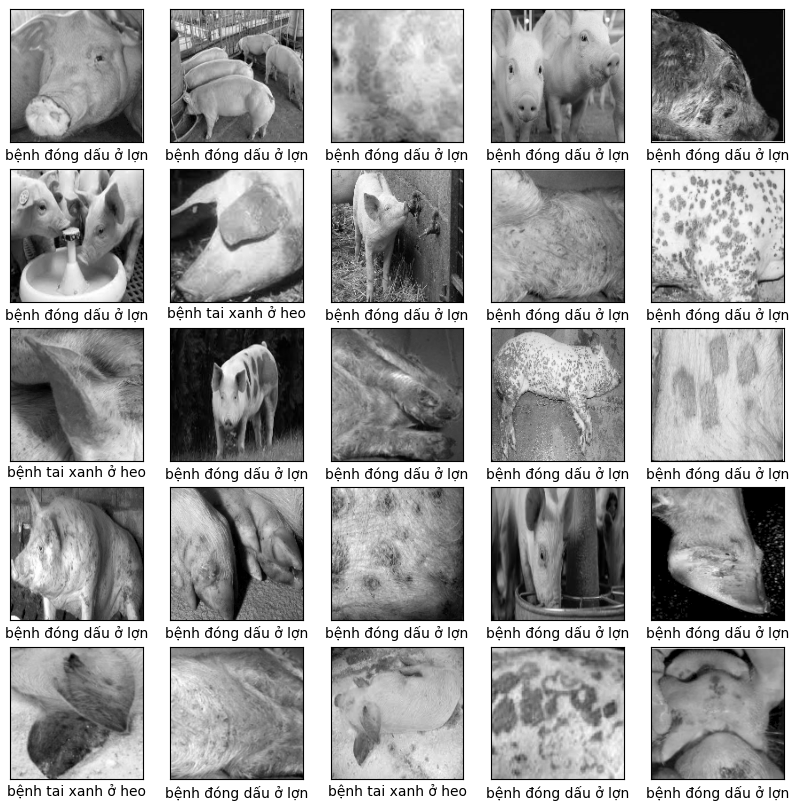

In [ ]:
encode = {
    0: "bệnh đóng dấu ở lợn",
    1: "bệnh tai xanh ở heo",
    2: "heo khỏe mạnh",
    3: "lmlm",
    4: "tử huyết trùng",
    5: "viêm da tiết dịch"
}
plt.figure(figsize=(10, 10))
random_indices = random.sample(range(len(trainX)), 25)
for i, idx in enumerate(random_indices):
    image = trainX[idx].reshape(img_size, img_size)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(encode[int(trainY[idx][1])])

plt.show()

In [ ]:
batch_size=64
epochs=50
classes =6

#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()

# bộ CNN 1
model.add(Conv2D(64, kernel_size=(3,3), activation = 'linear', input_shape=(img_size,img_size,1),padding = 'same'))
model.add(LeakyReLU(alpha=0.1))  # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding='same'))


# bộ CNN 2
model.add(Conv2D(128,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))


# bộ CNN 3
model.add(Conv2D(256,(3,3) , activation = 'linear' , padding = 'same'))
model.add(LeakyReLU(alpha = 0.1)) # Hàm xử lý dữ liệu (Ngưỡng)
model.add(MaxPooling2D((2,2), padding = 'same'))
     
# ANN Model
model.add(Flatten()) # Lấy kích thước trước rồi làm phẳng
model.add(Dense(256, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))


model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))     

# #Tăng cường data
# from keras.preprocessing.image import ImageDataGenerator
# aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
#     rescale=1./255,
# 	width_shift_range=0.1,
#     height_shift_range=0.1,
# 	horizontal_flip=True,
#     brightness_range=[0.2,1.5], fill_mode="nearest")

model.compile(loss = categorical_crossentropy, optimizer = Adam() , metrics=['accuracy'])
model.summary()
  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 64)      640       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 75, 75, 128)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 38, 38, 128)      0         
 2D)                                                  

In [ ]:

# Định nghĩa callback ModelCheckpoint
checkpoint = ModelCheckpoint('/content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/best_model.h5',
                             monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

#nếu không lưu lại kết quả 5 lần liên tiếp thì dừng mô hình 
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

# Huấn luyện mô hình với callback ModelCheckpoint và EarlyStopping
history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=epochs,
                    batch_size=batch_size, callbacks=[checkpoint, early_stopping])


Epoch 1/50
4/4 [==============================] - ETA: 0s - loss: 2.3798 - accuracy: 0.1457 
Epoch 1: val_accuracy improved from -inf to 0.15504, saving model to /content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/best_model.h5
4/4 [==============================] - 74s 19s/step - loss: 2.3798 - accuracy: 0.1457 - val_loss: 1.8959 - val_accuracy: 0.1550
Epoch 2/50
4/4 [==============================] - ETA: 0s - loss: 1.8210 - accuracy: 0.2065 
Epoch 2: val_accuracy did not improve from 0.15504
4/4 [==============================] - 54s 14s/step - loss: 1.8210 - accuracy: 0.2065 - val_loss: 1.9533 - val_accuracy: 0.1550
Epoch 3/50
4/4 [==============================] - ETA: 0s - loss: 1.8224 - accuracy: 0.1862 
Epoch 3: val_accuracy improved from 0.15504 to 0.24031, saving model to /content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/best_model.h5
4/4 [==============================] - 56s 15s/step - loss: 1.8224 - accuracy: 0.1862 - val_loss: 1.7774 - val_accuracy: 0.2403
Epoch 4/50
4/4 [=========

Text(0.5, 0, 'Epoch')

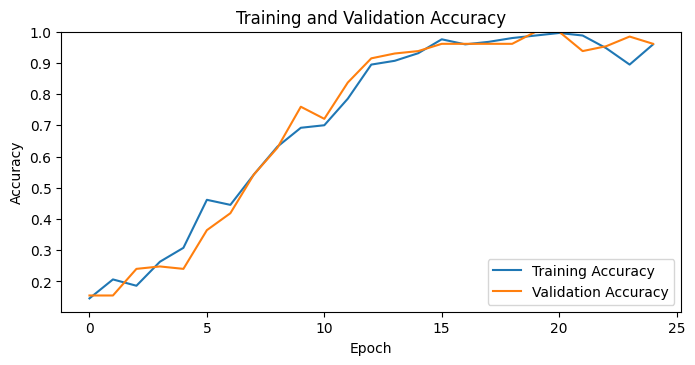

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')

In [ ]:
# Tải mô hình từ tệp .h5
model = load_model('/content/drive/MyDrive/XLA_cuoi_ki/benh_o_heo/best_model.h5')

# Lấy 50 mẫu ngẫu nhiên từ tập test
random_indices = np.random.choice(len(testX), size=50, replace=False)
random_testX = testX[random_indices]
random_testY = testY[random_indices]

# Đánh giá độ chính xác trên 50 mẫu ngẫu nhiên
loss, accuracy = model.evaluate(random_testX, random_testY)

print("Accuracy on random test samples:", accuracy)


2/2 [==============================] - 7s 348ms/step - loss: 0.0329 - accuracy: 1.0000
Accuracy on random test samples: 1.0


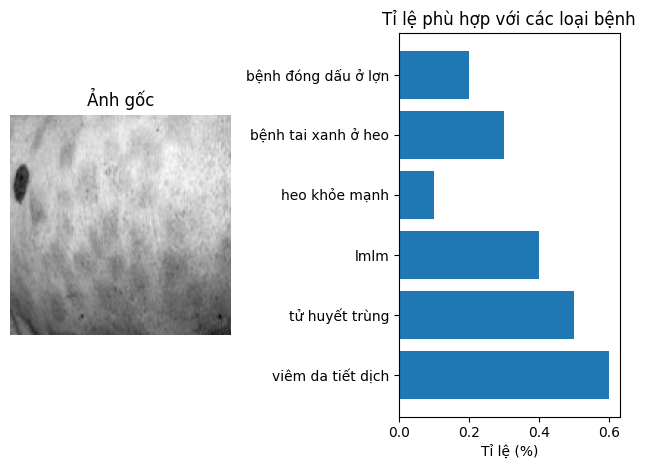

In [ ]:
from PIL import Image
# Đọc ảnh đầu vào
input_image = cv2.imread("/content/drive/MyDrive/XLA_cuoi_ki/screenshot_1684464133.png")

# probabilities = [0.2, 0.3, 0.1, 0.4, 0.5, 0.6]

# Chuyển đổi sang ảnh xám
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Resize ảnh
img_size = 150
input_image = cv2.resize(input_image, (img_size, img_size))

# Mở rộng số chiều của ảnh
input_image = np.expand_dims(input_image, axis=-1)

# Chuẩn hóa giá trị pixel về khoảng 0-1
input_image = input_image / 255.0

# Hiển thị ảnh gốc
plt.subplot(1, 2, 1)
plt.imshow(input_image.squeeze(), cmap='gray')
plt.title("Ảnh gốc")
plt.axis("off")


# Hiển thị ảnh đầu ra
plt.subplot(1, 2, 2)
plt.barh(list(encode.values()), [float(p) for p in probabilities])
plt.title("Tỉ lệ phù hợp với các loại bệnh")
plt.xlabel("Tỉ lệ (%)")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 32ms/step


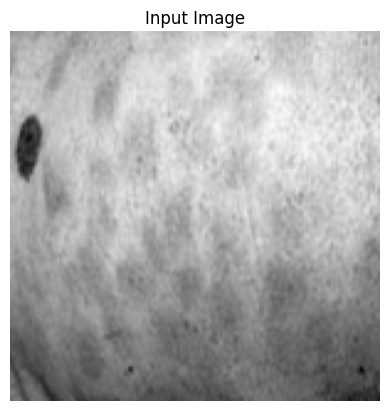

bệnh đóng dấu ở lợn: 83.93%
bệnh tai xanh ở heo: 0.02%
heo khỏe mạnh: 0.00%
lmlm: 8.10%
tử huyết trùng: 7.80%
viêm da tiết dịch: 0.14%


In [ ]:
from PIL import Image

# Đường dẫn đến file ảnh cần đánh giá
image_path = "/content/drive/MyDrive/XLA_cuoi_ki/screenshot_1684464133.png"

# Đọc ảnh đầu vào
input_image = Image.open(image_path).convert("L")

# Resize ảnh
img_size = 150
input_image = input_image.resize((img_size, img_size))

# Chuyển đổi thành mảng numpy và mở rộng số chiều
input_image = np.array(input_image) / 255.0
input_image = np.expand_dims(input_image, axis=-1)
input_image = np.expand_dims(input_image, axis=0)

# Đánh giá bệnh của ảnh
predictions = model.predict(input_image)
predicted_labels = np.argmax(predictions, axis=1)

probabilities = predictions[0] * 100  # Chuyển đổi thành tỉ lệ phần trăm
predicted_labels = predicted_labels[0]

# Hiển thị ảnh
plt.imshow(input_image.squeeze(), cmap="gray")
plt.title("Input Image")
plt.axis("off")
plt.show()

# In kết quả
for label, probability in zip(encode.values(), probabilities):
    print(f"{label}: {probability:.2f}%")